/tmp/ipykernel_2421615/575197200.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['arch_sum'] = plot_df['arch'].apply(lambda x: sum(int(i) for i in x.split(':')))


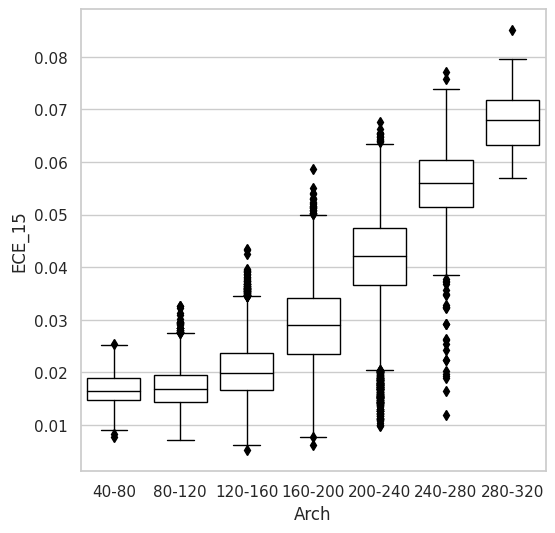

In [17]:
import pandas as pd
df = pd.read_csv('../../calibration-study/ImageNet_sss.csv')


bins = ['5', '10', '15', '20', '25', '50', '100', '200', '500']
columns_to_keep = [f'pre_ECE_{bin}' for bin in bins]
columns_to_keep.append('arch')
columns_to_keep.append('acc')

# Filter the DataFrame based on these column names
plot_df = df[[col for col in df.columns if col in columns_to_keep]]

plot_df['arch_sum'] = plot_df['arch'].apply(lambda x: sum(int(i) for i in x.split(':')))

plot_df = plot_df[['pre_ECE_15','acc','arch_sum']]
plot_df.columns = ['ECE_15','Accuracy','arch']



import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins and the labels for the bins
bins = np.arange(40, 360, 40)  # this creates an array [40, 80, 120, ..., 320]
labels = ['40-80', '80-120', '120-160', '160-200', '200-240', '240-280', '280-320']

# Add a new column 'arch_bins' to your DataFrame based on 'arch'
plot_df['arch_bins'] = pd.cut(plot_df['arch'], bins=bins, labels=labels, include_lowest=True)

# Set the plot style and create a new figure
sns.set(style="whitegrid")
plt.figure(figsize=(6, 6))

# Create a box plot
sns.boxplot(x='arch_bins', y='ECE_15', data=plot_df,
            boxprops=dict(facecolor='white', edgecolor='black', linewidth=1),
            capprops=dict(color='black', linewidth=1),
            whiskerprops=dict(color='black', linewidth=1),
            medianprops=dict(color='black', linewidth=1),
            flierprops=dict(markeredgecolor='black', markerfacecolor='black', markersize=5))

# Set the plot title and axis labels

plt.xlabel("Arch", fontsize=12)
plt.ylabel("ECE_15", fontsize=12)

# Show the plot
plt.show()